# A comprehensive comparitive study on Obesity/Overweight condition using binary and multiclass supervised learning classification techniques

### Background
This dataset contains data for the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition, data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed to add suitable target labels.

**The paper publised for this dataset is:**
[1] Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

**Features are:**

Gender

Age

Height

Weight

**The attributes related with eating habits are:**

<b>(FAVC): </b> Frequent consumption of high caloric food

<b>(FCVC): </b> Frequency of consumption of vegetables

<b>(NCP): </b>Number of main meals

<b>(CAEC): </b> Consumption of food between meals

<b>(CH20): </b> Consumption of water daily (CH20)

<b>(CALC): </b> Consumption of alcohol (CALC)

**The attributes related with the physical condition are:**

<b>(SCC): </b> Calories consumption monitoring

<b>(FAF): </b> Physical activity frequency

<b>(TUE): </b> Time using technology devices

<b>(MTRANS): </b> Transportation used.

<b> (NObeyesdad): </b> Obesity level Classification.

Finally, all data was labeled and the class variable NObesity was created with the values based on the following criteria(reference WHO) based on the Body Mass Index(BMI).

•Underweight Less than 18.5

•Normal 18.5 to 24.9

•Overweight 25.0 to 29.9

•Obesity I 30.0 to 34.9

•Obesity II 35.0 to 39.9

•Obesity III Higher than 40




# Importing Libraries

In [63]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

plt.rcParams['figure.figsize'] = [15,8]

# Reading the data

#### First 5 Observations

In [64]:
df_obese=pd.read_excel("obese.xlsx")
df_obese.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II


#  Preliminary Investigation

#### Shape of the dataset

In [65]:
df_obese.shape

(2111, 17)

#### Inference: The survey was done on 2111 people for 16 different types of variables in their lifestyle and family history.

#### Information from the dataset

In [66]:
df_obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### Describe the numerical features

In [67]:
df_obese.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Age,2111.000000,24.312600,6.345968,14.000000,19.947192,22.777890,26.000000,61.000000
Height,2111.000000,1.701677,0.093305,1.450000,1.630000,1.700499,1.768464,1.980000
Weight,2087.000000,86.725045,26.260992,39.000000,65.956344,83.000000,108.015907,173.000000
FCVC,2111.000000,2.419043,0.533927,1.000000,2.000000,2.385502,3.000000,3.000000
NCP,2111.000000,2.685628,0.778039,1.000000,2.658738,3.000000,3.000000,4.000000
CH2O,2111.000000,2.008011,0.612953,1.000000,1.584812,2.000000,2.477420,3.000000
FAF,2111.000000,1.010298,0.850592,0.000000,0.124505,1.000000,1.666678,3.000000
TUE,2111.000000,0.657866,0.608927,0.000000,0.000000,0.625350,1.000000,2.000000


#### Describe the categorical features

In [68]:
df_obese.describe(include="object").T

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,yes,1726
FAVC,2111,2,yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,no,2067
SCC,2111,2,no,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


#### Inference: Describe function provides the statistical summary of the different features in the dataset. Count of records in the Weight variable is less which says there is missing values present.

# Missing Value Investigation

#### Missing values

In [69]:
df_obese.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                            24
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

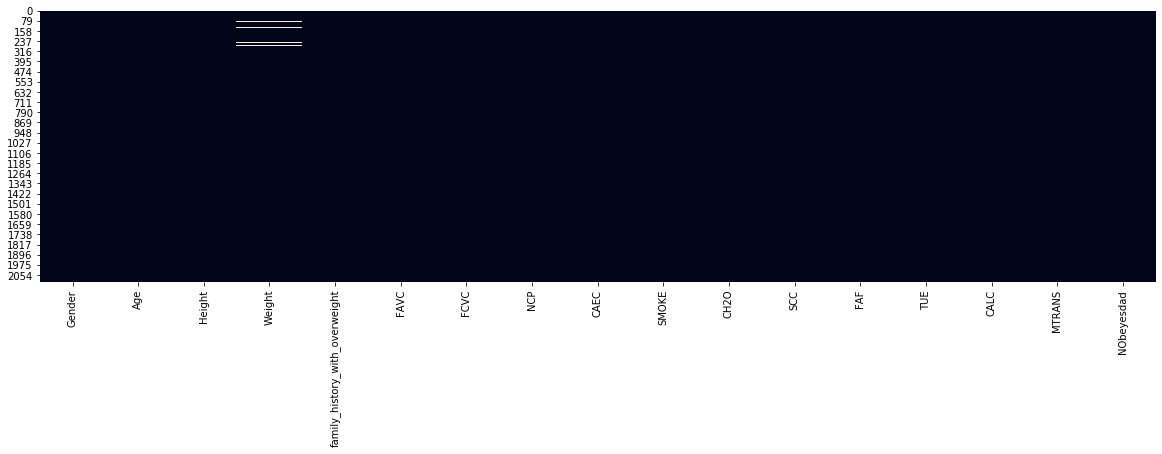

In [70]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_obese.isnull(), cbar=False)
plt.show()

#### Filling Missing Values

#### Approach 1: Conventional way of filling with median or mean. Meadian is considered.

#### Before replacing NaNs

In [71]:
df_obese_1=df_obese.copy()

In [72]:
df_obese_1.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                            24
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

#### Replacing NaNs with median

In [73]:
df_obese_1.Weight.replace(np.NaN,df_obese_1.Weight.median(),inplace=True)

#### After replacing NaNs

In [74]:
df_obese_1.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### Approach 2: Replacing NaNs with KNNImputer

#### Before replacing NaNs

In [75]:
df_obese.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                            24
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [76]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [77]:
df_num=df_obese.select_dtypes(include="number")

In [78]:
df_cat=df_obese.select_dtypes(include="object")

In [79]:
df_num_1 = imputer.fit_transform(df_num)
df_num_1_c=df_num.columns
df_knn=pd.DataFrame(df_num_1,columns=df_num_1_c)

In [80]:
df_obese=pd.concat([df_knn,df_cat],axis=1)

#### After replacing NaNs

In [81]:
df_obese.isna().sum()

Age                               0
Height                            0
Weight                            0
FCVC                              0
NCP                               0
CH2O                              0
FAF                               0
TUE                               0
Gender                            0
family_history_with_overweight    0
FAVC                              0
CAEC                              0
SMOKE                             0
SCC                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Comparing the statistical measures of for Weight columns from Approach 1 and Approach 2

#### Describe Approach 1(Median Replacement)

In [82]:
df_obese_1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.682695,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.114201,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,66.000000,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Describe Approach 2(KNNImputer)

In [83]:
df_obese.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.671529,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.145498,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,66.000000,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


####  <b>Inference</b> Both the approaches performed to fill missing values have produced almost same results.

In [84]:
df=df_obese.copy()

# Data Visualization

### Correlation Heatmap

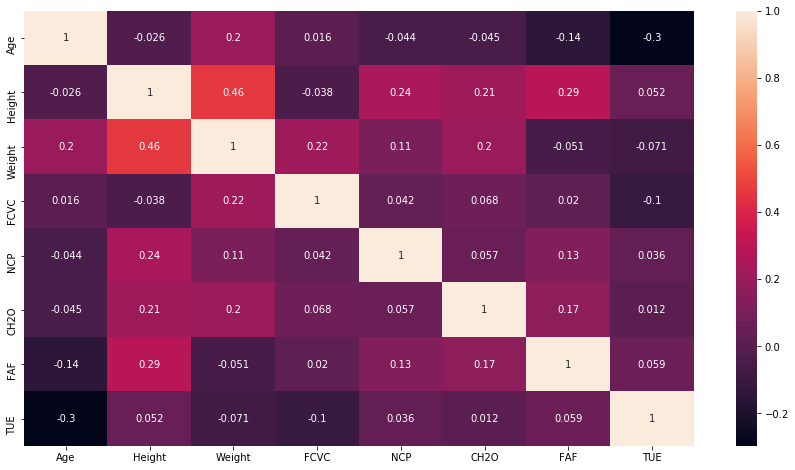

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### <b>Inference:</b> There is a strong correlation between height and weight whereas other variables have very less correlation

### Gender-Wise Counts from the Dataset

Male      1068
Female    1043
Name: Gender, dtype: int64


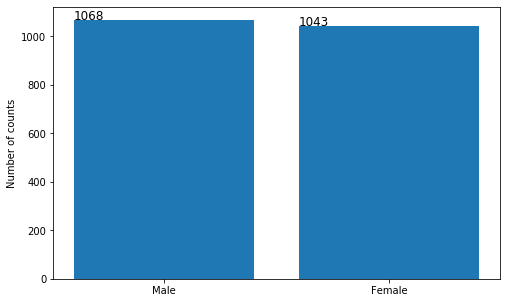

In [86]:
u1=df.Gender.value_counts()
print(u1)
Gender_name = df.Gender.value_counts().index
Gender_size = df.Gender.value_counts().values

fig,ax=plt.subplots(figsize=(8,5))
ax.bar(Gender_name, Gender_size, data=df)
ax.set_ylabel('Number of counts')
for p in ax.patches:
    an=ax.annotate(str(p.get_height()), xy=(p.get_x(),p.get_height()))
    an.set_size(12)

#### Inference: Both Males and Females thaken in this survey are almost equal in number.

#### Types of Obesity and their Value counts

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


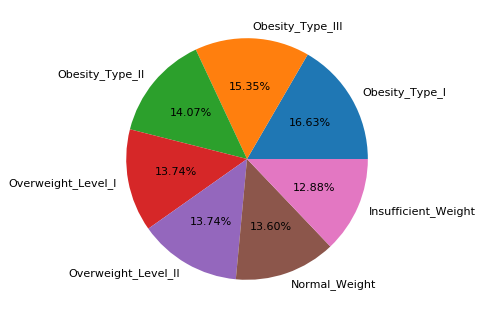

In [87]:
x=df['NObeyesdad'].value_counts()
print(x)
fig = plt.figure(figsize=(5,5), dpi=80)

plt.pie(df['NObeyesdad'].value_counts().values,labels=df['NObeyesdad'].value_counts().index,autopct='%.2f%%')
plt.show()

#### Inference: This shows that the target classes are BALANCED equally.

### Types of Transportation used

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


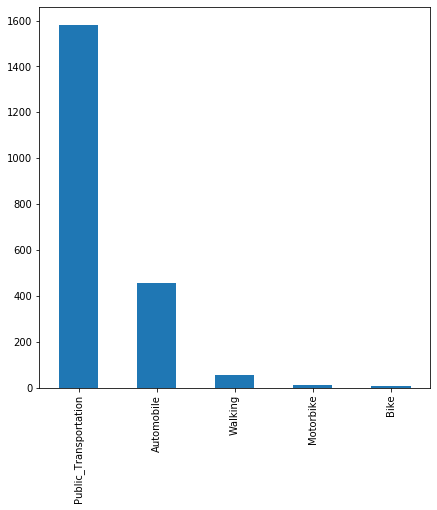

In [88]:
u=df['MTRANS'].value_counts()
print(u)
fig = plt.figure(figsize=(7,7))
df['MTRANS'].value_counts().plot(kind='bar')
plt.show()

#### Inference: Most of the people use "public Transport for their commute".

### Smoke-Gender Comparison

no     2067
yes      44
Name: SMOKE, dtype: int64


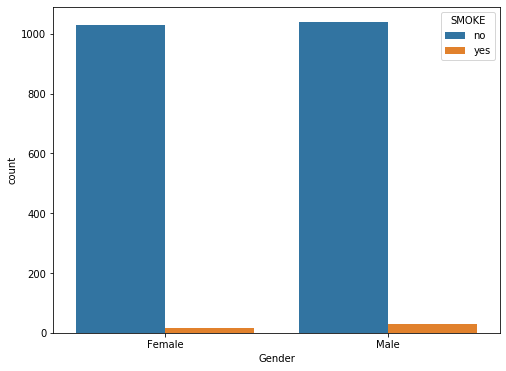

In [89]:
s1=df.SMOKE.value_counts()
print(s1)
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'Gender', hue = 'SMOKE')
plt.show()

#### Inference: Number of Smokers are very less in both the genders.

### Boxplot of the Independent variables

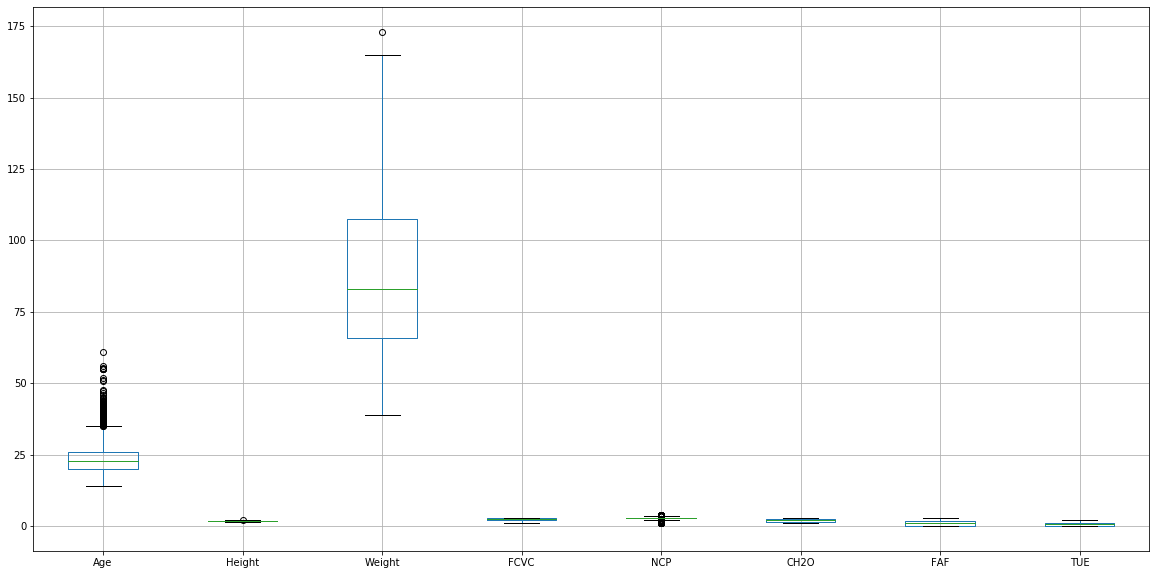

In [90]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

#### Inference: There is more outliers in age could be due to survey concentrated more on midlle to old age people where the obesity chances are more . Other variables have negligible outliers

### Distribution plots for numeric independent variables

Age       1.529100
Height   -0.012855
Weight    0.247017
FCVC     -0.432906
NCP      -1.107097
CH2O     -0.104912
FAF       0.498490
TUE       0.618502
dtype: float64


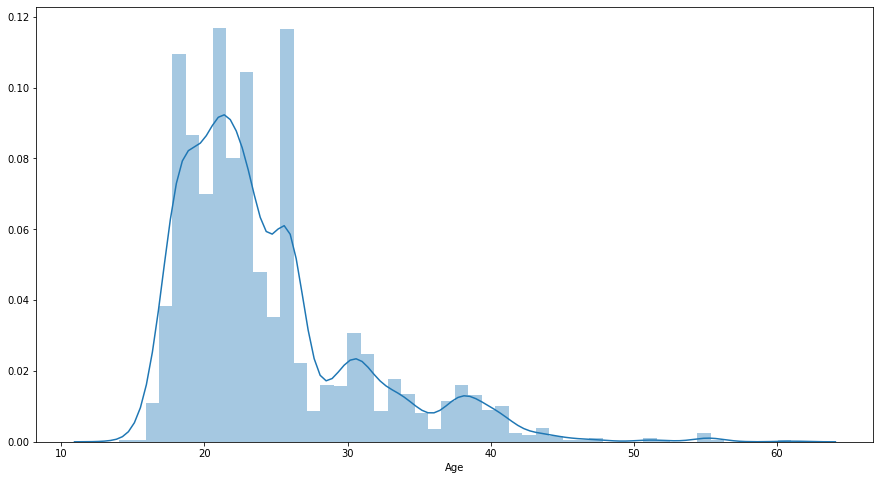

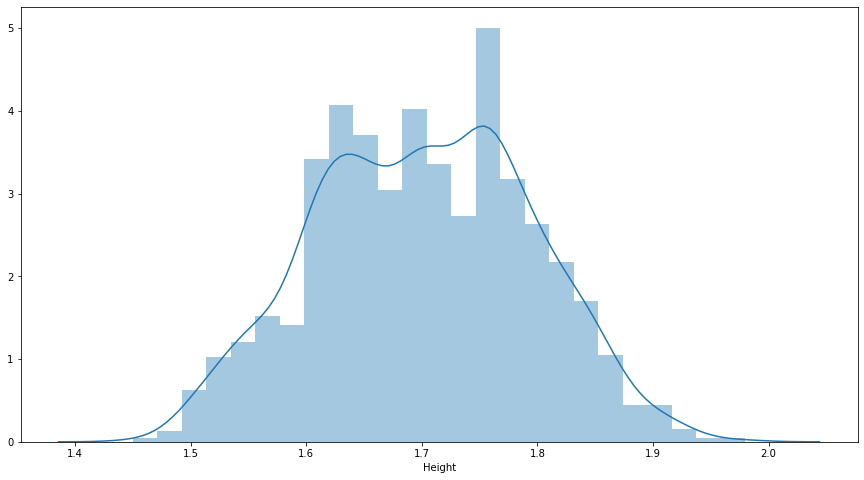

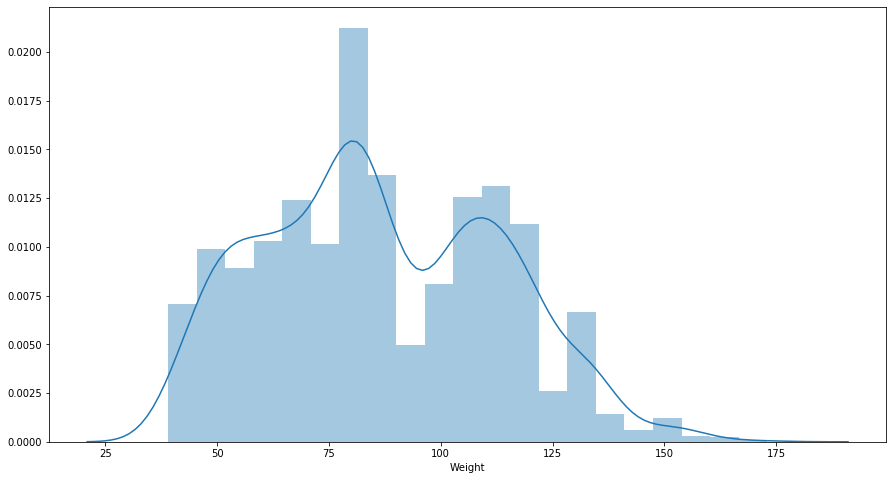

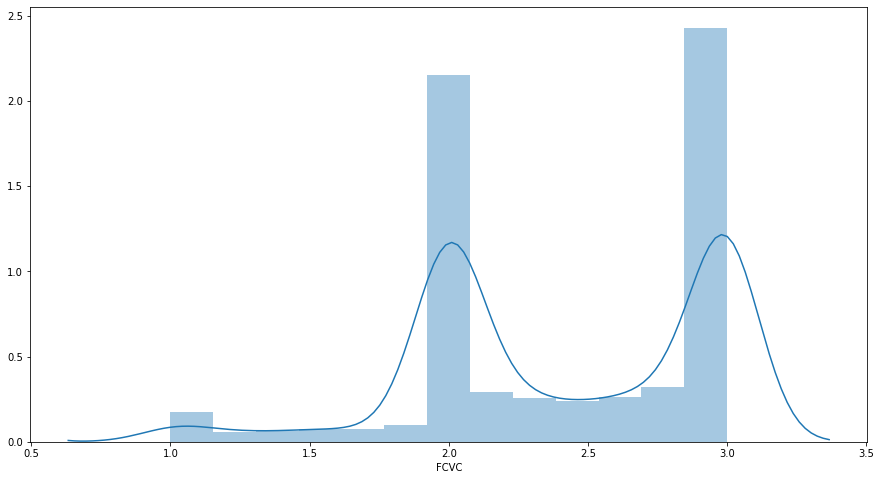

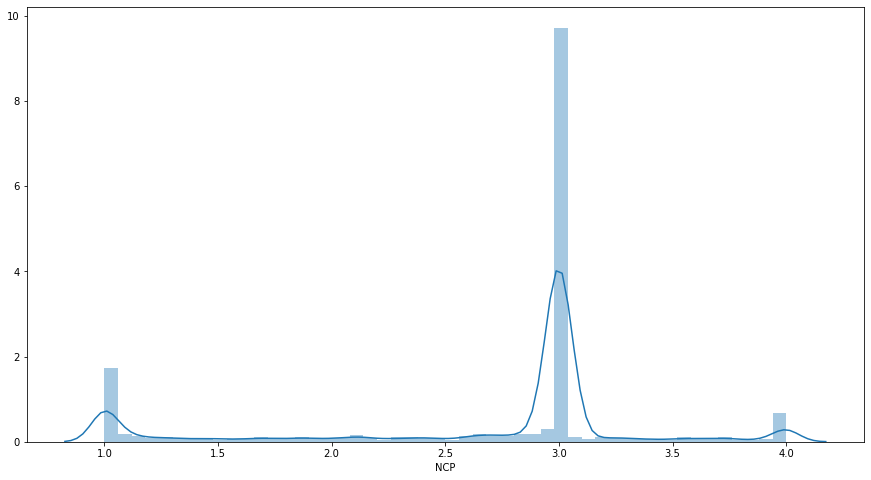

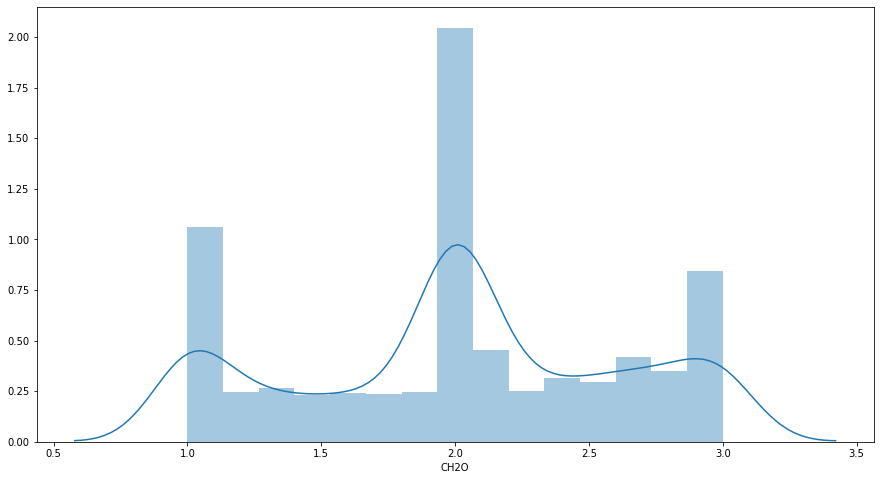

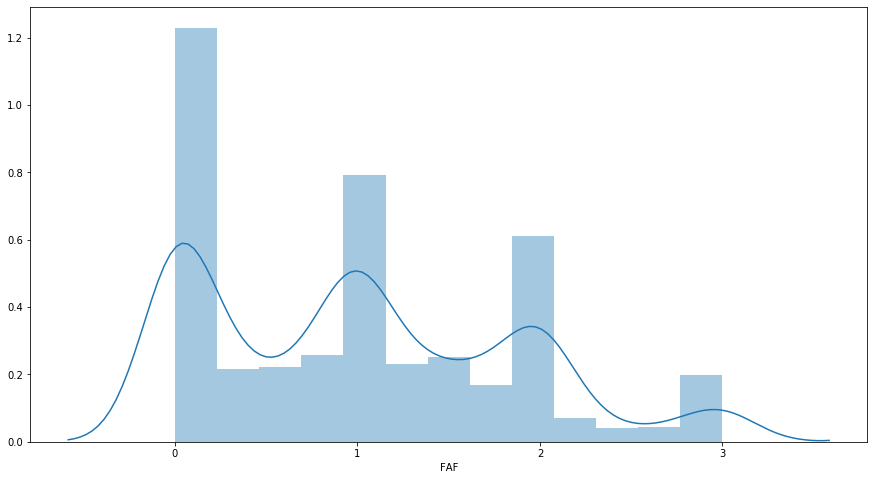

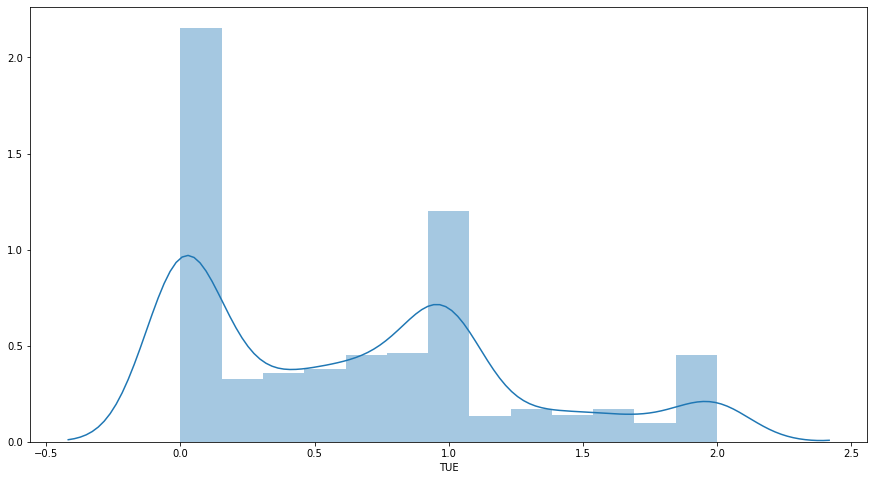

In [91]:
print(df_num.skew())

for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.show()

#### Inference: Age is slighlty right skewed where as other variables are almost normally distributed.

### Height vs Weight of the people comparsion 

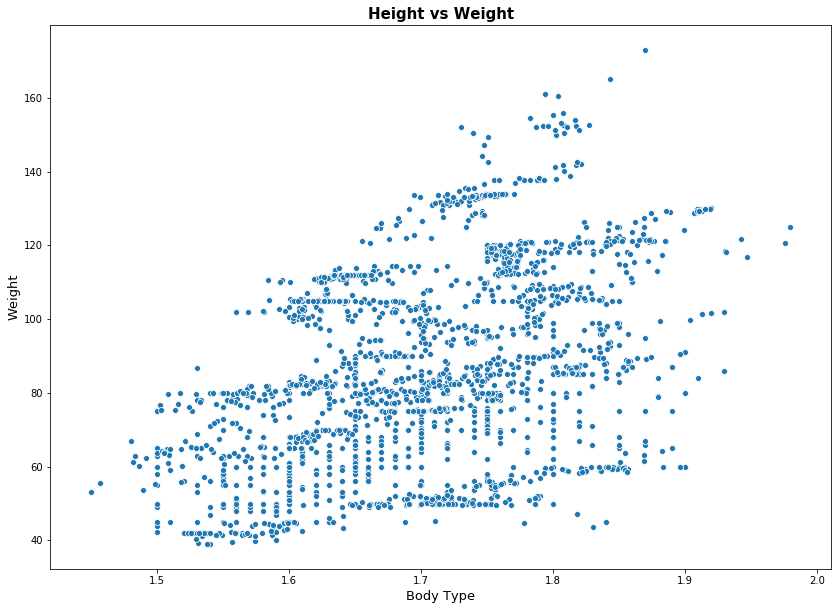

In [92]:
plt.figure(figsize=(14,10))
sns.scatterplot(x="Height", y="Weight", data=df)
plt.xlabel("Body Type", size=13)
plt.ylabel("Weight", size=13)
plt.title("Height vs Weight",size=15, weight='bold')
plt.show()

#### Inference: There is slight positive corelation with height and weight and can be seen from the plot above.

### Family history with overweight

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64


<Figure size 720x720 with 0 Axes>

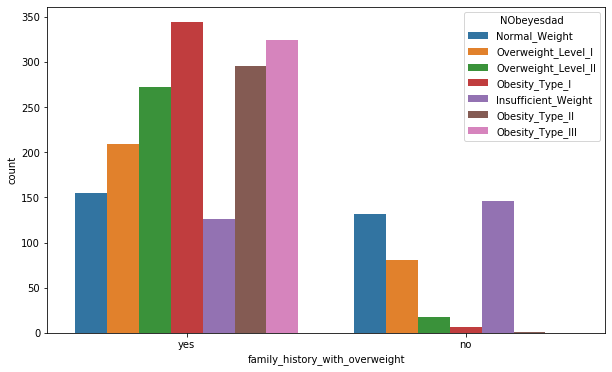

In [93]:
plt.figure(figsize=(10,10))
s1=df.family_history_with_overweight.value_counts()
print(s1)
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'family_history_with_overweight',hue="NObeyesdad")
plt.show()

#### Inference: We see with the presence of family history with obsesity, people are more likely to develop obesity.

### Target feature Engineering to a obese_Overweight[Yes/No]

In [94]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

### Logic Employed:

As per the paper that was published on this dataset it has been been mentioned that for classes **'Normal_Weight','Insufficient_Weight' the BMI would be less than 25.**
Hence, we have classified them as a "No" and others to be "Yes" to have the learnings of Binary Classification applied.

In [95]:
df["Overwt_Obese"]=""

In [96]:
for i in range(len(df.NObeyesdad.values)):
    if df.NObeyesdad[i] in ['Normal_Weight','Insufficient_Weight']:
        df.iloc[i,17]="No"
    else:
        df.iloc[i,17]="Yes"   

In [97]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Overwt_Obese
0,21.000000,1.620000,64.000000,2.000000,3.000000,2.000000,0.000000,1.000000,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,No
1,21.000000,1.520000,56.000000,3.000000,3.000000,3.000000,3.000000,0.000000,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,No
2,23.000000,1.800000,77.000000,2.000000,3.000000,2.000000,2.000000,1.000000,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,No
3,27.000000,1.800000,87.000000,3.000000,3.000000,2.000000,2.000000,0.000000,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,Yes
4,22.000000,1.780000,89.800000,2.000000,1.000000,2.000000,0.000000,0.000000,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,Yes


#### A new column Overwt_Obese has been added to the dataset having classification obese Yes or No.

Yes    1552
No      559
Name: Overwt_Obese, dtype: int64


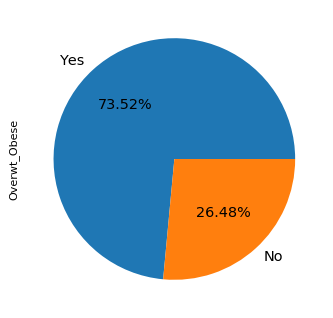

In [98]:
x=df['Overwt_Obese'].value_counts()
print(x)
fig = plt.figure(figsize=(5,5), dpi=80)
df['Overwt_Obese'].value_counts().plot(kind='pie', autopct='%.2f%%', startangle=360, fontsize=13)
plt.show()

#### Inference: It may look that the data for positive and negative classes are 73-27 ratio. We will not go ahead with class balancing as it seems logical that less people will have obesity in the population.

# EDA Inferences:

**1) The survey was done on 2111 people for 16 different types of variables in their lifestyle and family history.**

**2) Missing values have been handled using both median and KNNimputer imputation.**

**3) There is a strong correlation between height and weight whereas other variables have very less correlation.**

**4) Both Males and Females thaken in this survey are almost equal in number.**

**5) Target classes are BALANCED equally.**

**6) Most of the people use "public Transport for their commute".**

**7) There are more outliers in age could be due to survey concentrated more on midlle to old age people where the obesity chances are more . Other variables have negligible outliers.**

**8) Age is slighlty right skewed where as other variables are almost normally distributed.**

**9) We see with the presence of family history with obsesity, people are more likely to develop obesity.**

## Comparitive Study using various Binary/Multiclass classification algorithms

In [1110]:
df_cat=df.select_dtypes(include="object")
df_cat_X=df_cat.drop(columns=["NObeyesdad","Overwt_Obese"])
df_cat_X.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


In [1111]:
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
df_cat_X_dummy.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0
2,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


# 1. Logistic Regression (Binary)

In [1112]:
score_card = pd.DataFrame(columns=["Model Name",'Prob.Cutoff',"Stability","r2_score", 'AUC', 'Precision', 'Recall',
                                       'Accuracy', 'Kappa', 'f1-score'])
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred_prob = model.predict(X_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":model.prsquared,
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

def plot_confusion_matrix_test(model):
    y_pred_prob = model.predict(X_test)
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

### Target counts per class

In [1113]:
df.Overwt_Obese.value_counts()

Yes    1552
No      559
Name: Overwt_Obese, dtype: int64

In [1114]:
df.Overwt_Obese.value_counts()/df.shape[0]*100

Yes   73.519659
No    26.480341
Name: Overwt_Obese, dtype: float64

In [1115]:
(df.Overwt_Obese.value_counts()/df.shape[0]*100).index

Index(['Yes', 'No'], dtype='object')

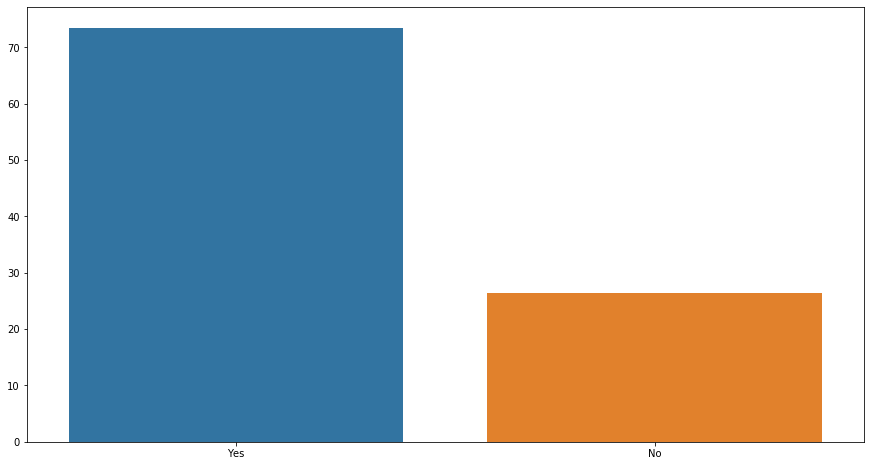

In [1116]:
sns.barplot((df.Overwt_Obese.value_counts()/df.shape[0]*100).index,(df.Overwt_Obese.value_counts()/df.shape[0]*100).values)
plt.show()

In [1117]:
df.Overwt_Obese.replace({"No":0,"Yes":1},inplace=True)

In [1118]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
#df_num_X.head()

In [1119]:
sc=StandardScaler()
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
a=sc.fit_transform(df_num_X)
b=df_num_X.columns
df_num_std=pd.DataFrame(a,columns=b)
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)

X=pd.concat([df_cat_X_dummy,df_num_std],axis=1)
X=sm.add_constant(X)
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
logreg_binary = sm.Logit(y_train, X_train).fit()
print(logreg_binary.summary())

         Current function value: 0.044807
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           Overwt_Obese   No. Observations:                 1688
Model:                          Logit   Df Residuals:                     1664
Method:                           MLE   Df Model:                           23
Date:                Sat, 03 Apr 2021   Pseudo R-squ.:                  0.9217
Time:                        06:46:26   Log-Likelihood:                -75.634
converged:                      False   LL-Null:                       -965.35
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.7833   9554.622     -0.000      1.000   -1.87e+04    1.

#### Confusion Matrix for test data

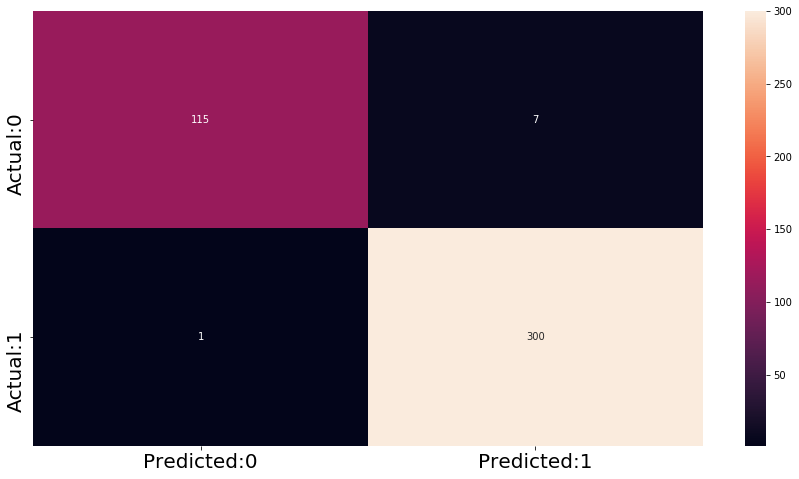

In [1120]:
plot_confusion_matrix_test(logreg_binary)

#### Youdens Table threshold selection

In [1121]:
y_pred_prob = logreg_binary.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.993355,0.049180,0.690932,0.944175
1,0.996678,0.057377,0.533479,0.939301
2,0.993355,0.057377,0.573448,0.935978
3,0.976744,0.040984,0.844753,0.935761
4,0.976744,0.049180,0.826516,0.927564


#### Classification report for test data

In [1122]:
y_pred_prob = logreg_binary.predict(X_test)
y_pred = [ 0 if x < 0.69 else 1 for x in y_pred_prob]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       122
           1       0.98      0.99      0.99       301

    accuracy                           0.98       423
   macro avg       0.98      0.97      0.98       423
weighted avg       0.98      0.98      0.98       423



#### ROC curve for Simple Binary Logistic Regression

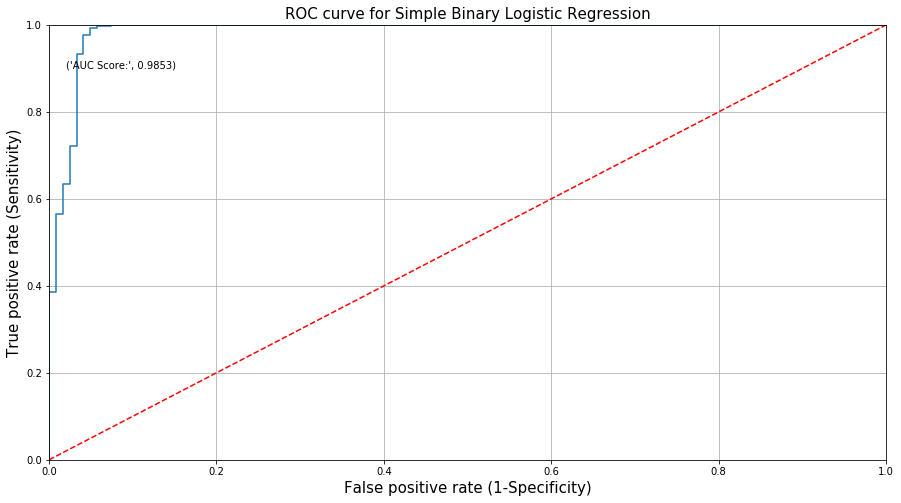

In [1123]:
y_pred_prob = logreg_binary.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Simple Binary Logistic Regression', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

#### Updated Score Card

In [1124]:
score_card

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score


In [1125]:
update_score_card("Simple Binary Logistic Regression",logreg_binary,cutoff=0.69,stability="Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799


# 2) Logistic Regression(Binary RFE)

#### Feature Selection using RFE

In [1126]:
accuracy_score=[]
for i in range(1,20):
    X_train_rfe = X_train.iloc[:,1:]
    X_test_rfe = X_test.iloc[:,1:]
    logreg = LogisticRegression()
    rfe_model = RFE(estimator = logreg, n_features_to_select = i)
    rfe_model = rfe_model.fit(X_train_rfe, y_train)
    feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)
    signi_feat_rfe = feat_index[feat_index==1].index
    accuracy_score.append(rfe_model.score(X_train_rfe,y_train))

lis_acc={(i+1,np.round(accuracy_score[i],4))  for i in range(0,19)}
lis_acc

{(1, 0.9236),
 (2, 0.9775),
 (3, 0.9805),
 (4, 0.9775),
 (5, 0.9799),
 (6, 0.981),
 (7, 0.9816),
 (8, 0.9828),
 (9, 0.9852),
 (10, 0.9822),
 (11, 0.984),
 (12, 0.9852),
 (13, 0.9858),
 (14, 0.9864),
 (15, 0.9858),
 (16, 0.9846),
 (17, 0.9834),
 (18, 0.9846),
 (19, 0.9846)}

#### Selecting features for an appropriate n_features_to_select from previous step

In [1127]:
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select = 14)
rfe_model = rfe_model.fit(X_train_rfe, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes',
       'MTRANS_Motorbike', 'MTRANS_Walking', 'Age', 'Height', 'Weight',
       'FCVC'],
      dtype='object')


#### Model with features from RFE

In [1128]:
sc=StandardScaler()
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
a=sc.fit_transform(df_num_X)
b=df_num_X.columns
df_num_std=pd.DataFrame(a,columns=b)
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)

X=pd.concat([df_cat_X_dummy,df_num_std],axis=1)
X=X[signi_feat_rfe]
X=sm.add_constant(X)
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
logreg_binary_rfe = sm.Logit(y_train, X_train).fit()
print(logreg_binary_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.046640
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:           Overwt_Obese   No. Observations:                 1688
Model:                          Logit   Df Residuals:                     1673
Method:                           MLE   Df Model:                           14
Date:                Sat, 03 Apr 2021   Pseudo R-squ.:                  0.9184
Time:                        06:46:30   Log-Likelihood:                -78.729
converged:                       True   LL-Null:                       -965.35
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  9.7024      1.534   

#### Confusion Matrix

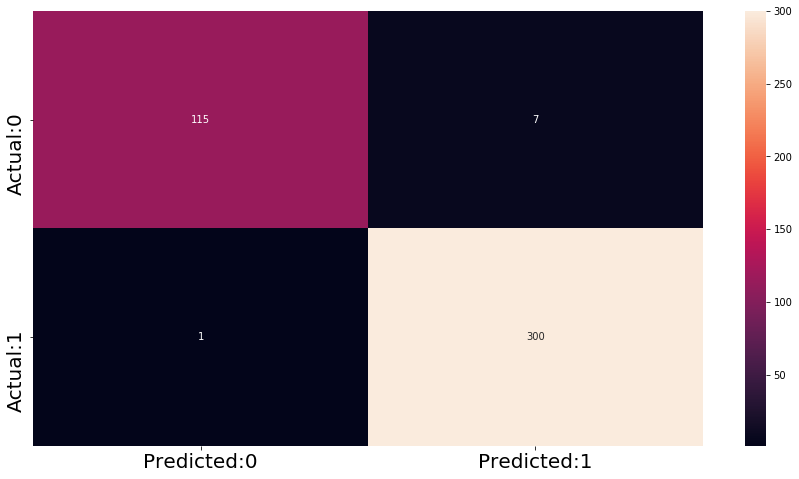

In [1129]:
plot_confusion_matrix_test(logreg_binary_rfe)

#### Select appropriate threshold based on Youdens table

In [1130]:
y_pred_prob = logreg_binary_rfe.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.986711,0.032787,0.842623,0.953924
1,0.996678,0.049180,0.600097,0.947497
2,0.986711,0.049180,0.793974,0.937531
3,1.000000,0.073770,0.347848,0.926230
4,0.996678,0.073770,0.460268,0.922907


#### Classification Report

In [1131]:
y_pred_prob = logreg_binary_rfe.predict(X_test)
y_pred = [ 0 if x < 0.84 else 1 for x in y_pred_prob]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       122
           1       0.99      0.99      0.99       301

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



#### ROC curve for Binary RFE Logistic Regression

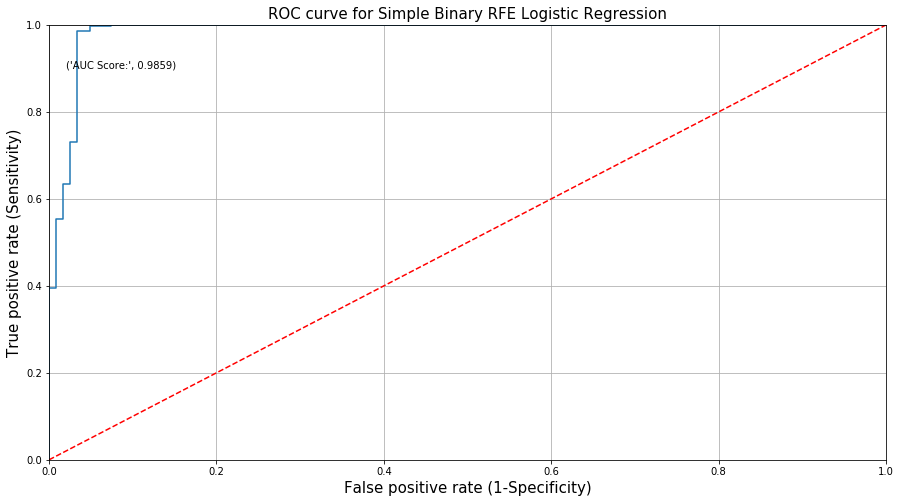

In [1132]:
y_pred_prob = logreg_binary_rfe.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Simple Binary RFE Logistic Regression', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

#### Updated Score Card

In [1133]:
update_score_card("Simple Binary RFE Logistic Regression",logreg_binary_rfe,cutoff=0.84,stability="Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711


# 3) Gaussian Naive Bayes(Binary)

#### Classification Report

In [1134]:
sc=StandardScaler()
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
a=sc.fit_transform(df_num_X)
b=df_num_X.columns
df_num_std=pd.DataFrame(a,columns=b)
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)

X=pd.concat([df_cat_X_dummy,df_num_std],axis=1)
X=X[signi_feat_rfe]
#X=sm.add_constant(X)
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)
print(classification_report(y_test, y_pred))

def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    y_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       122
           1       0.89      0.88      0.89       301

    accuracy                           0.84       423
   macro avg       0.80      0.81      0.81       423
weighted avg       0.84      0.84      0.84       423



#### Updated Score Card

In [1135]:
update_score_card("Binary gNB Classifier",gnb_model,stability="Moderate")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288


# 4) KNN Classifier(Binary)

In [1136]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    print(classification_report(y_test, test_pred))
    
def get_train_report(model):
    test_pred = model.predict(X_train)
    print(classification_report(y_train,test_pred))    

def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1:]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for KNN Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [1137]:
# X and Y for model fitting

In [1138]:
sc=StandardScaler()
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
a=sc.fit_transform(df_num_X)
b=df_num_X.columns
df_num_std=pd.DataFrame(a,columns=b)
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)

X=pd.concat([df_cat_X_dummy,df_num_std],axis=1)
X=X[signi_feat_rfe]
#X=sm.add_constant(X)
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

#### Confusion Matrix for KNN model- Not tuned

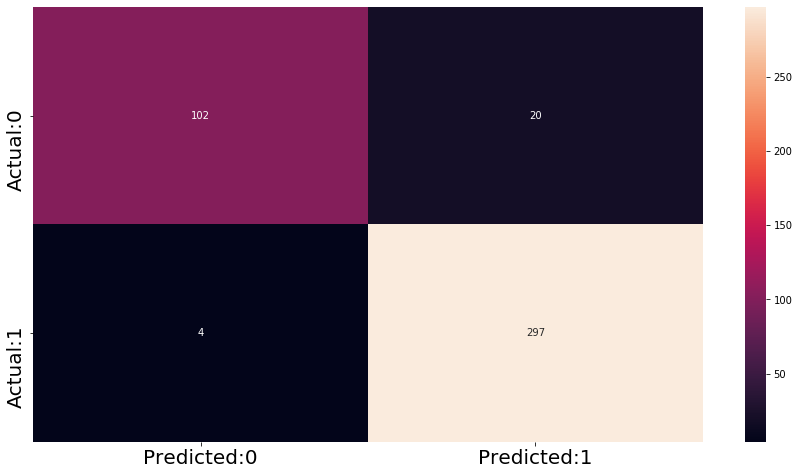

In [1139]:
knn_classification = KNeighborsClassifier()
knn_model = knn_classification.fit(X_train, y_train)
plot_confusion_matrix(knn_model)

def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    y_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

#### Classification Report

In [1140]:
get_test_report(knn_model)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       122
           1       0.94      0.99      0.96       301

    accuracy                           0.94       423
   macro avg       0.95      0.91      0.93       423
weighted avg       0.94      0.94      0.94       423



#### ROC Curve

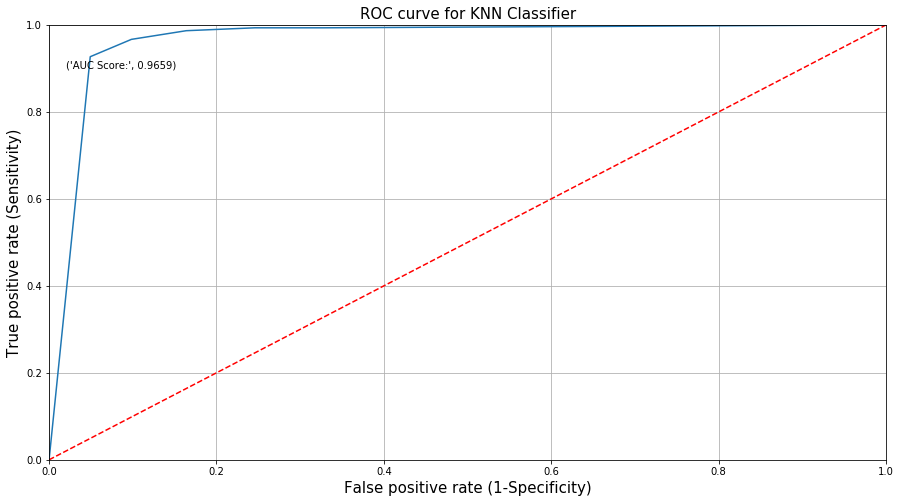

In [1141]:
plot_roc(knn_model)

#### Updated Score Card

In [1142]:
update_score_card("Binary KNN Classifier before tuning",knn_model,stability="Moderate")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165


#### Finding appropriate K and metric

In [1143]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 3} 



#### Confusion Matrix for KNN model- Tuned

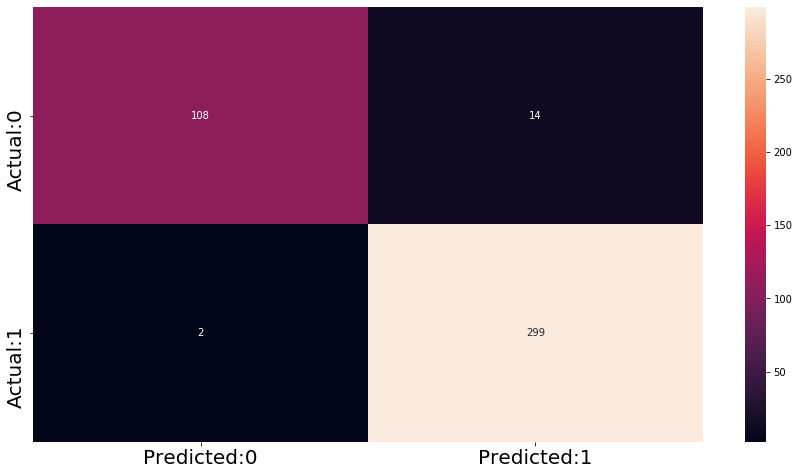

In [1144]:
knn_classification = KNeighborsClassifier(metric='manhattan',n_neighbors=3)
knn_model_tuned = knn_classification.fit(X_train, y_train)
plot_confusion_matrix(knn_model_tuned)

def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    y_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

#### Classification Report(Test)

In [1145]:
get_test_report(knn_model_tuned)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       122
           1       0.96      0.99      0.97       301

    accuracy                           0.96       423
   macro avg       0.97      0.94      0.95       423
weighted avg       0.96      0.96      0.96       423



#### Classification Report(Train)

In [1146]:
get_train_report(knn_model_tuned)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       437
           1       0.98      0.98      0.98      1251

    accuracy                           0.97      1688
   macro avg       0.97      0.97      0.97      1688
weighted avg       0.97      0.97      0.97      1688



#### Inferenece:Classification Report on train and test is stable across target labels and not much overfitting it seen

#### ROC Curve

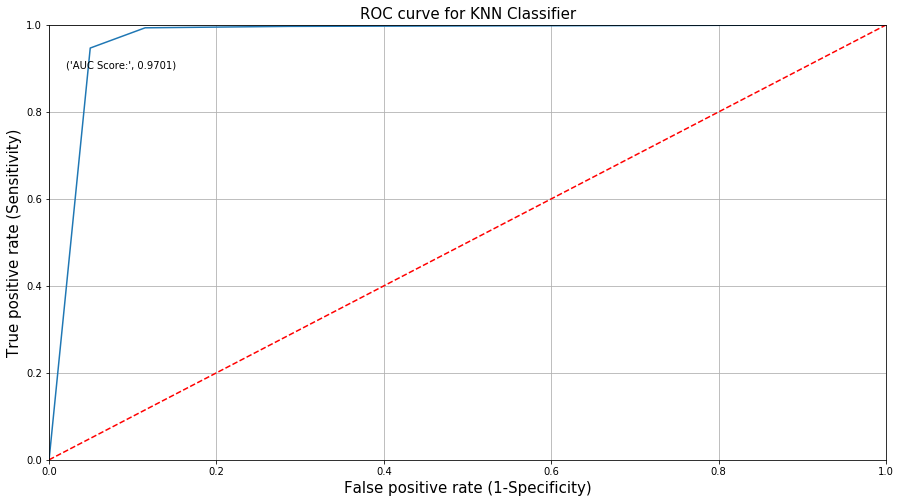

In [1147]:
plot_roc(knn_model_tuned)

#### Updated Score Card

In [1148]:
update_score_card("Binary KNN Classifier after tuning",knn_model_tuned,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941


# 5) Decision Tree(Binary)

In [1149]:
from sklearn.tree import DecisionTreeClassifier

In [1150]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1:]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Decision Tree Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [1151]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
#X=X[signi_feat_rfe]
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
dt_model = DecisionTreeClassifier(random_state = 10)
decision_tree = dt_model.fit(X_train, y_train)
get_train_report(decision_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00      1251

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688



In [1152]:
get_test_report(decision_tree)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       122
           1       0.95      0.99      0.97       301

    accuracy                           0.96       423
   macro avg       0.96      0.94      0.95       423
weighted avg       0.96      0.96      0.96       423



In [1153]:
update_score_card("Binary Decision Tree Classifier before tuning",decision_tree,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588


#### Hyperparameter tuning - Decision Tree

In [363]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



#### Model fit as per Hyperparameters

In [1154]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
#X=X[signi_feat_rfe]
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 5,
                                  min_samples_split =2 ,                            
                                  max_leaf_nodes = 9,                                  
                                  random_state = 10)
decision_tree_tuned = dt_model.fit(X_train, y_train)
get_train_report(decision_tree_tuned)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       437
           1       0.98      0.99      0.98      1251

    accuracy                           0.97      1688
   macro avg       0.97      0.96      0.97      1688
weighted avg       0.97      0.97      0.97      1688



In [1155]:
get_test_report(decision_tree_tuned)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       122
           1       0.94      0.99      0.96       301

    accuracy                           0.94       423
   macro avg       0.95      0.91      0.93       423
weighted avg       0.94      0.94      0.94       423



#### Inference: After tuning overfitting of train data has slightly improved.

#### Confusion Matrix

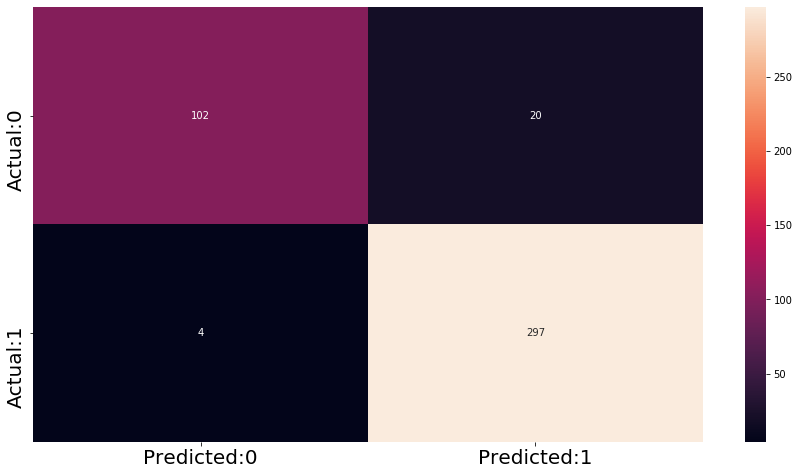

In [1156]:
plot_confusion_matrix(decision_tree_tuned)

#### Plotting the Decision Tree

In [1]:
from sklearn import tree

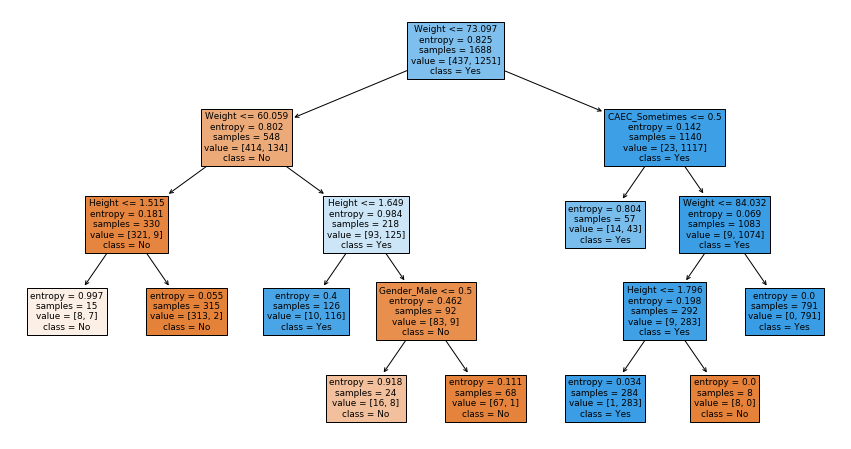

In [1158]:
tree.plot_tree(decision_tree_tuned, feature_names=X_train.columns,class_names=["No","Yes"], filled=True,max_depth=None)
plt.show()

#### ROC Curve

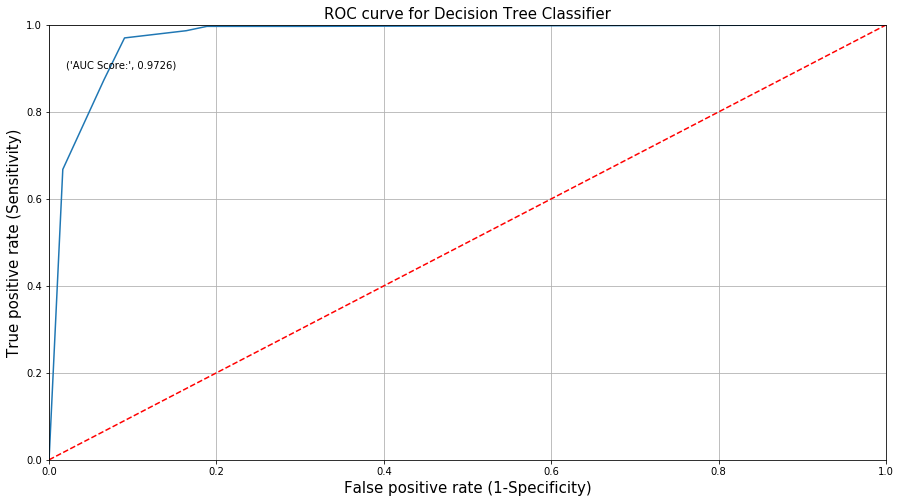

In [1159]:
plot_roc(decision_tree_tuned)

#### Updated Score Card

In [1160]:
update_score_card("Binary Decision Tree Classifier after tuning",decision_tree_tuned,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165


# 6) Random Forest(Binary)

In [1161]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1:]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Random Forest Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [1162]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
#X=X[signi_feat_rfe]
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)
get_train_report(rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00      1251

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688



In [1163]:
get_test_report(rf_model)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       122
           1       0.96      0.98      0.97       301

    accuracy                           0.96       423
   macro avg       0.95      0.94      0.94       423
weighted avg       0.95      0.96      0.95       423



#### Inference: Overfitting seen on the train data. Need to finetune the parameters.

#### Updated Score Card

In [1164]:
update_score_card("Binary Random Forest Classifier before tuning",rf_model,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699


#### Hyperparameter tuning - Random Forest

In [366]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
X=X[signi_feat_rfe]
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 90} 



#### Model fit as per Hyperparameters

In [1165]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

rf_classification = RandomForestClassifier(criterion="entropy",
                                           max_depth=10,
                                           max_leaf_nodes=11,
                                           min_samples_leaf=1,
                                           min_samples_split=8,
                                           n_estimators=90,
                                           random_state = 10)
rf_model_tuned = rf_classification.fit(X_train, y_train)
get_train_report(rf_model_tuned)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       437
           1       0.97      0.98      0.98      1251

    accuracy                           0.96      1688
   macro avg       0.96      0.94      0.95      1688
weighted avg       0.96      0.96      0.96      1688



In [1166]:
get_test_report(rf_model_tuned)

              precision    recall  f1-score   support

           0       0.95      0.84      0.90       122
           1       0.94      0.98      0.96       301

    accuracy                           0.94       423
   macro avg       0.95      0.91      0.93       423
weighted avg       0.94      0.94      0.94       423



#### Inference: After tuning the overfitting on the train data is improved.

#### Confusion Matrix

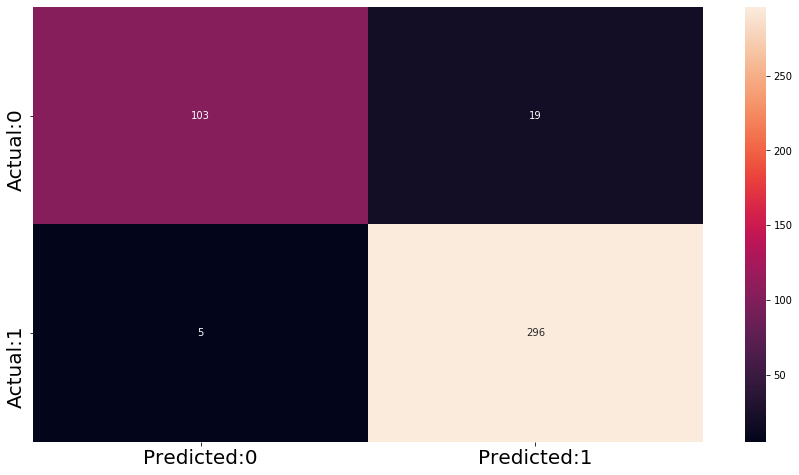

In [1167]:
plot_confusion_matrix(rf_model_tuned)

#### ROC Curve

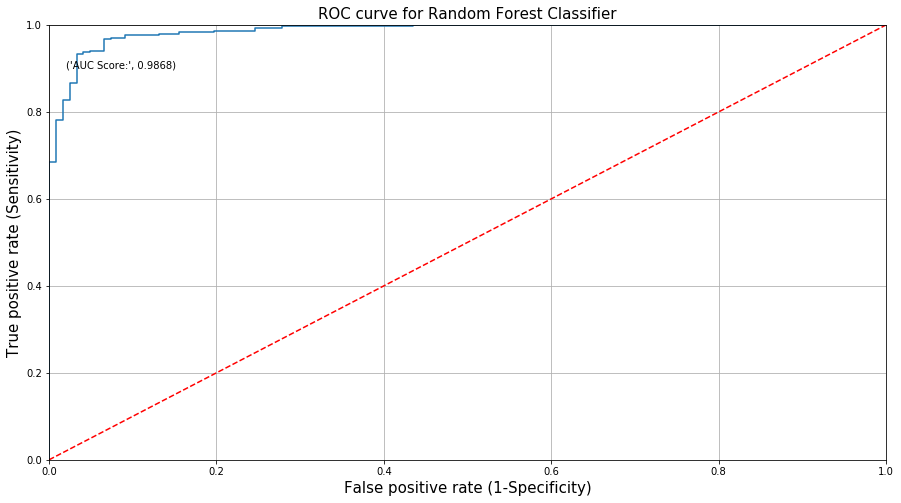

In [1168]:
plot_roc(rf_model_tuned)

#### Updated Score Card

In [1169]:
update_score_card("Binary Random Forest Classifier after tuning",rf_model_tuned,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039


# 7) XGBoost(Binary)

In [1170]:
from xgboost import XGBClassifier

In [1171]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1:]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for xgboost Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [1172]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)
get_train_report(xgb_model)

[06:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00      1251

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688



In [1173]:
get_test_report(xgb_model)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       122
           1       0.96      1.00      0.98       301

    accuracy                           0.97       423
   macro avg       0.98      0.95      0.97       423
weighted avg       0.97      0.97      0.97       423



#### Updated Score Card

In [1174]:
update_score_card("Binary XGBClassifier before tuning",xgb_model,stability="Moderate")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


#### Hyperparameter tuning - XGBoost

In [378]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[14:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:17:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters for XGBoost classifier:  {'gamma': 2, 'learning_rate':

#### Model fit as per Hyperparameters

In [1197]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=df['Overwt_Obese']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

xgb_model_tuned = XGBClassifier(gamma=5,learning_rate=0.5,max_depth = 5)
xgb_model_tuned.fit(X_train, y_train)
get_train_report(xgb_model_tuned)

[06:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       437
           1       1.00      1.00      1.00      1251

    accuracy                           0.99      1688
   macro avg       0.99      0.99      0.99      1688
weighted avg       0.99      0.99      0.99      1688



In [1198]:
get_test_report(xgb_model_tuned)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       122
           1       0.96      1.00      0.98       301

    accuracy                           0.97       423
   macro avg       0.98      0.95      0.96       423
weighted avg       0.97      0.97      0.97       423



#### Confusion Matrix

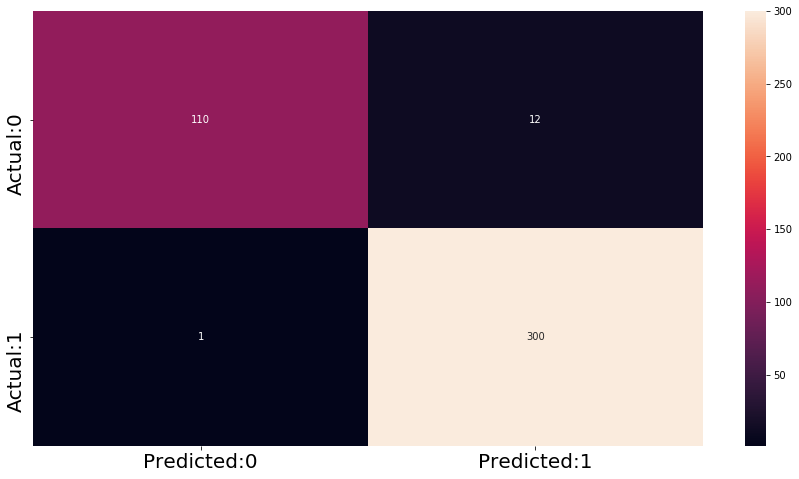

In [1199]:
plot_confusion_matrix(xgb_model_tuned)

#### ROC Curve

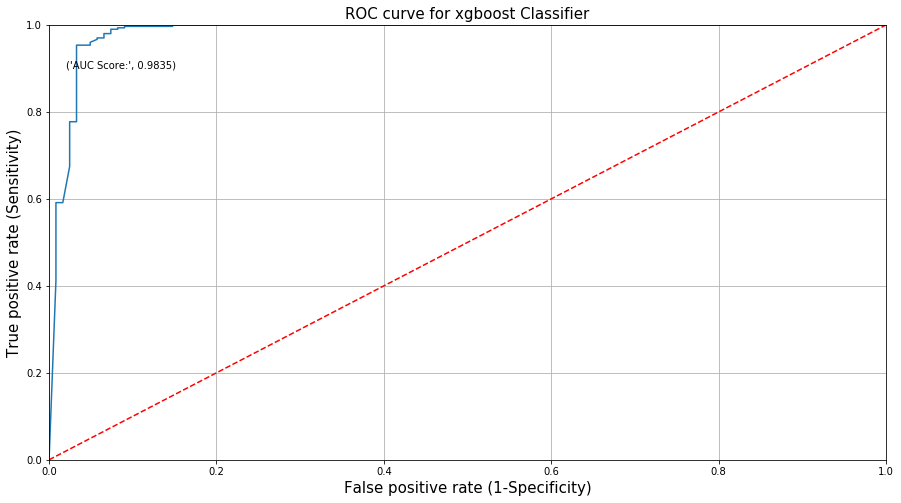

In [1200]:
plot_roc(xgb_model_tuned)

#### Updated Score Card

In [1201]:
update_score_card("Binary XGBClassifier after tuning",xgb_model_tuned,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


# 8) MultiClass Logistic Regression

#### Multiclass label of the variable "NObeyesdad"

In [1202]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [1203]:
mapp={'Normal_Weight':0,'Overweight_Level_I':1, 'Overweight_Level_II':2,
       'Obesity_Type_I':3, 'Insufficient_Weight':4, 'Obesity_Type_II':5,
       'Obesity_Type_III':6}

In [1204]:
dfm=df.copy()

In [1205]:
dfm['NObeyesdad'].replace(mapp,inplace=True)

#### Target after Labelling

In [1206]:
dfm['NObeyesdad'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

#### LogisticRegression for multiclass using "ONE vs REST(OVR)"

In [1207]:
from imblearn.over_sampling import SMOTE 

In [1208]:
sc=StandardScaler()
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
a=sc.fit_transform(df_num_X)
b=df_num_X.columns
df_num_std=pd.DataFrame(a,columns=b)
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)

X=pd.concat([df_cat_X_dummy,df_num_std],axis=1)
X=X[signi_feat_rfe]
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)
from sklearn.linear_model import LogisticRegression
logreg_rfe_multiclass = LogisticRegression(random_state=10, multi_class='ovr')
logreg_rfe_multiclass.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', random_state=10)

#### Classification Report

In [1209]:
y_pred=logreg_rfe_multiclass.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.48      0.59        64
           1       0.80      0.64      0.71        64
           2       0.52      0.47      0.49        51
           3       0.53      0.62      0.58        64
           4       0.79      0.97      0.87        58
           5       0.78      1.00      0.88        61
           6       1.00      1.00      1.00        61

    accuracy                           0.74       423
   macro avg       0.74      0.74      0.73       423
weighted avg       0.74      0.74      0.73       423



#### Multilabel Confusion Matrix

In [1210]:
from sklearn.metrics import multilabel_confusion_matrix

In [1211]:
cm = multilabel_confusion_matrix(y_test, y_pred)
cm

array([[[349,  10],
        [ 33,  31]],

       [[349,  10],
        [ 23,  41]],

       [[350,  22],
        [ 27,  24]],

       [[324,  35],
        [ 24,  40]],

       [[350,  15],
        [  2,  56]],

       [[345,  17],
        [  0,  61]],

       [[362,   0],
        [  0,  61]]], dtype=int64)

In [1212]:
# Modifying the function to work for sklearn logistic and other classification libraries.

In [1213]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card

#### Updated Score Card

In [1214]:
update_score_card("Multiclass Logistic Regression",logreg_rfe_multiclass,stability="Not Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


# 9) MultiNomial Naive Bayes(Multiclass)

#### mNB Classification Report

In [1215]:
from sklearn.preprocessing import MinMaxScaler

In [1216]:
sc=MinMaxScaler()
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
a=sc.fit_transform(df_num_X)
b=df_num_X.columns
df_num_std=pd.DataFrame(a,columns=b)
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)

X=pd.concat([df_cat_X_dummy,df_num_std],axis=1)
X=X[signi_feat_rfe]
#X=sm.add_constant(X)
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
from sklearn.naive_bayes import MultinomialNB 
mnb=MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)
y_pred = mnb_model.predict(X_test)
print(classification_report(y_test, y_pred))

def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card

              precision    recall  f1-score   support

           0       0.43      0.20      0.28        64
           1       0.81      0.20      0.33        64
           2       0.20      0.02      0.04        51
           3       0.23      0.61      0.34        64
           4       0.20      0.02      0.03        58
           5       0.48      0.38      0.42        61
           6       0.40      1.00      0.58        61

    accuracy                           0.36       423
   macro avg       0.39      0.35      0.29       423
weighted avg       0.40      0.36      0.29       423



#### Updated Score Card

In [1224]:
update_score_card("MultinomialNB Classifier(Test)",mnb_model,stability="Not Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


#### mNB Classification Report(Train)

In [1225]:
y_pred = mnb_model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.22      0.31       223
           1       0.71      0.22      0.33       226
           2       0.35      0.03      0.05       239
           3       0.26      0.58      0.36       287
           4       0.61      0.05      0.09       214
           5       0.52      0.49      0.50       236
           6       0.41      0.99      0.58       263

    accuracy                           0.39      1688
   macro avg       0.48      0.37      0.32      1688
weighted avg       0.47      0.39      0.33      1688



#### Updated Score Card

In [1226]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_train)
    y_pred_pred=model.predict(X_train)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_train, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_train, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_train, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_train, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_train, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_train, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_train, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card
update_score_card("MultinomialNB Classifier(Train)",mnb_model,stability="Not Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


# 10) MultiClass KNN Classifier

#### Classification Report

In [1259]:
sc=StandardScaler()
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
a=sc.fit_transform(df_num_X)
b=df_num_X.columns
df_num_std=pd.DataFrame(a,columns=b)
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)

X=pd.concat([df_cat_X_dummy,df_num_std],axis=1)
X=X[signi_feat_rfe]
#X=sm.add_constant(X)
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [1260]:
knn_classification = KNeighborsClassifier()
knn_model_multi = knn_classification.fit(X_train, y_train)
get_test_report(knn_model_multi)

def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card

              precision    recall  f1-score   support

           0       0.88      0.59      0.71        64
           1       0.84      0.81      0.83        64
           2       0.78      0.84      0.81        51
           3       0.83      0.92      0.87        64
           4       0.84      0.98      0.90        58
           5       0.97      1.00      0.98        61
           6       1.00      1.00      1.00        61

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.87       423
weighted avg       0.88      0.88      0.87       423



#### Updated Score Card

In [1261]:
update_score_card("Multiclass KNN Classifier(Test)",knn_model_multi,stability="Moderate")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


#### Multiclass KNN Classifier(Train)

In [1262]:
y_pred = knn_model_multi.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       223
           1       0.84      0.83      0.83       226
           2       0.87      0.89      0.88       239
           3       0.93      0.93      0.93       287
           4       0.94      0.95      0.95       214
           5       0.97      0.98      0.98       236
           6       1.00      1.00      1.00       263

    accuracy                           0.91      1688
   macro avg       0.91      0.91      0.91      1688
weighted avg       0.91      0.91      0.91      1688



#### ROC Curve for MultiClass

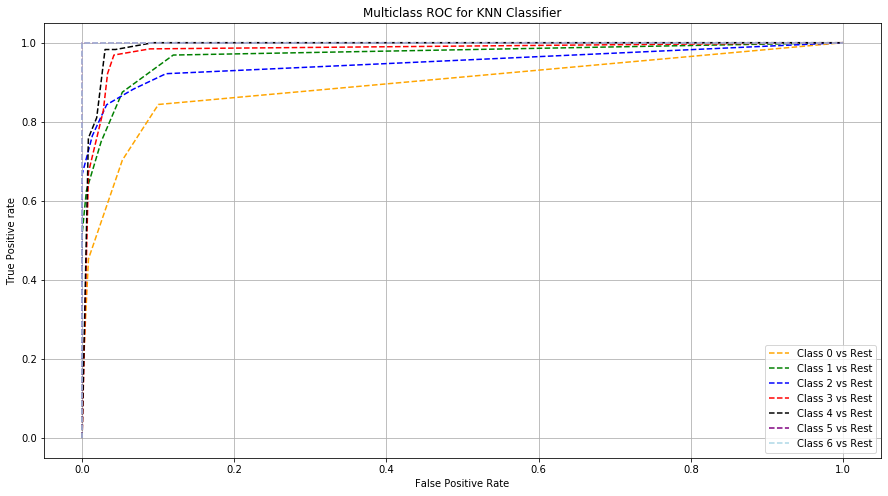

In [1263]:
fpr = {}
tpr = {}
thresh ={}

n_class = 7
y_pred_cnb = knn_model_multi.predict(X_test)
y_prob_pred_cnb = knn_model_multi.predict_proba(X_test)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='lightblue', label='Class 6 vs Rest')
plt.title('Multiclass ROC for KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Confusion Matrix

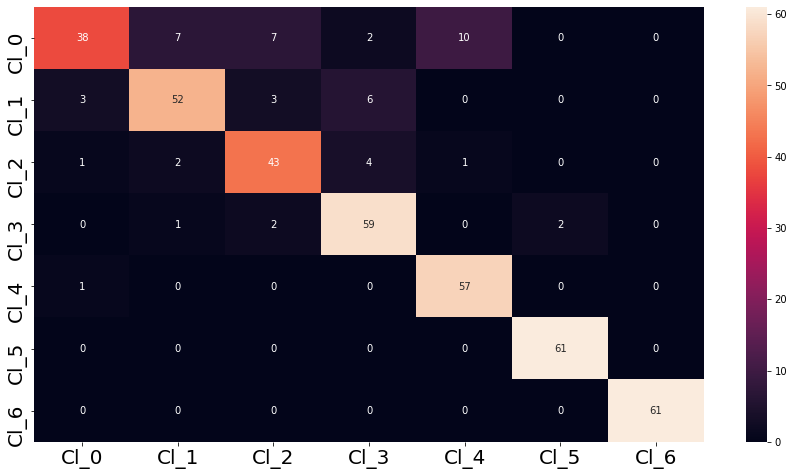

In [1264]:
y_pred = knn_model_multi.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_multiclass=pd.DataFrame(cm,columns=["Cl_0","Cl_1","Cl_2","Cl_3","Cl_4","Cl_5","Cl_6"],
                          index=["Cl_0","Cl_1","Cl_2","Cl_3","Cl_4","Cl_5","Cl_6"])
sns.heatmap(cm_multiclass, annot = True, fmt = 'd')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### Updated Score Card

In [1265]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_train)
    y_pred_pred=model.predict(X_train)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_train, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_train, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_train, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_train, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_train, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_train, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_train, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card
update_score_card("Multiclass KNN Classifier(Train)",knn_model_multi,stability="Moderate")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


# 11) Decision Tree(MultiClass)

#### Classfication report for test and train

In [1290]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
dt_model = DecisionTreeClassifier(random_state = 10)
decision_tree = dt_model.fit(X_train, y_train)
get_train_report(decision_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       287
           4       1.00      1.00      1.00       214
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       263

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688



In [1291]:
get_test_report(decision_tree)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        64
           1       0.91      0.92      0.91        64
           2       0.96      0.88      0.92        51
           3       0.86      0.95      0.90        64
           4       0.93      0.93      0.93        58
           5       0.97      0.97      0.97        61
           6       1.00      1.00      1.00        61

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423



#### Updated Score Card

In [1292]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card
update_score_card("Multiclass Decision Tree Classifier before tuning",decision_tree,stability="Moderate")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


#### Hyperparameter tuning

In [508]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



#### Model fit as hyperparameter values

In [1293]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
dt_model = DecisionTreeClassifier(criterion="gini",
                                  max_depth=7,
                                  random_state = 10)
decision_tree_tuned = dt_model.fit(X_train, y_train)
get_train_report(decision_tree_tuned)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       223
           1       0.88      0.78      0.83       226
           2       0.85      0.97      0.90       239
           3       0.99      0.98      0.99       287
           4       1.00      1.00      1.00       214
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       263

    accuracy                           0.95      1688
   macro avg       0.95      0.95      0.95      1688
weighted avg       0.95      0.95      0.95      1688



In [1294]:
get_test_report(decision_tree_tuned)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        64
           1       0.82      0.73      0.78        64
           2       0.74      0.90      0.81        51
           3       0.86      0.94      0.90        64
           4       0.91      0.90      0.90        58
           5       0.95      0.92      0.93        61
           6       1.00      0.98      0.99        61

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



In [1295]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card
update_score_card("Multiclass Decision Tree Classifier after tuning",decision_tree_tuned,stability="Not Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


# 12) Random Forest Tree(MultiClass)

In [1296]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)
get_train_report(rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       287
           4       1.00      1.00      1.00       214
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       263

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688



In [1297]:
get_test_report(rf_model)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        64
           1       0.91      0.83      0.87        64
           2       0.89      0.82      0.86        51
           3       0.90      0.97      0.93        64
           4       0.94      0.88      0.91        58
           5       1.00      0.98      0.99        61
           6       1.00      0.98      0.99        61

    accuracy                           0.91       423
   macro avg       0.91      0.90      0.91       423
weighted avg       0.91      0.91      0.91       423



In [1298]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card
update_score_card("Multiclass Random Forest Classifier before tuning",rf_model,stability="Not Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


#### Hyperparameter Tuning- Random Forest

In [775]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 90} 



#### Model fit as hyperparameter values

In [1305]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

rf_classification = RandomForestClassifier(criterion="gini",
                                            n_estimators = 90,
                                           max_features="sqrt",
                                           max_depth=10,
                                           max_leaf_nodes=11,
                                           min_samples_leaf=1,
                                           min_samples_split=11,
                                            random_state = 10)
rf_model_tuned = rf_classification.fit(X_train, y_train)
get_train_report(rf_model_tuned)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       223
           1       0.82      0.56      0.67       226
           2       0.69      0.68      0.69       239
           3       0.74      0.78      0.76       287
           4       0.81      0.89      0.85       214
           5       0.83      0.99      0.90       236
           6       0.99      1.00      0.99       263

    accuracy                           0.80      1688
   macro avg       0.80      0.80      0.79      1688
weighted avg       0.80      0.80      0.79      1688



In [1306]:
get_test_report(rf_model_tuned)

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        64
           1       0.92      0.52      0.66        64
           2       0.48      0.57      0.52        51
           3       0.65      0.75      0.70        64
           4       0.75      0.84      0.80        58
           5       0.81      0.95      0.87        61
           6       1.00      1.00      1.00        61

    accuracy                           0.75       423
   macro avg       0.76      0.75      0.74       423
weighted avg       0.77      0.75      0.75       423



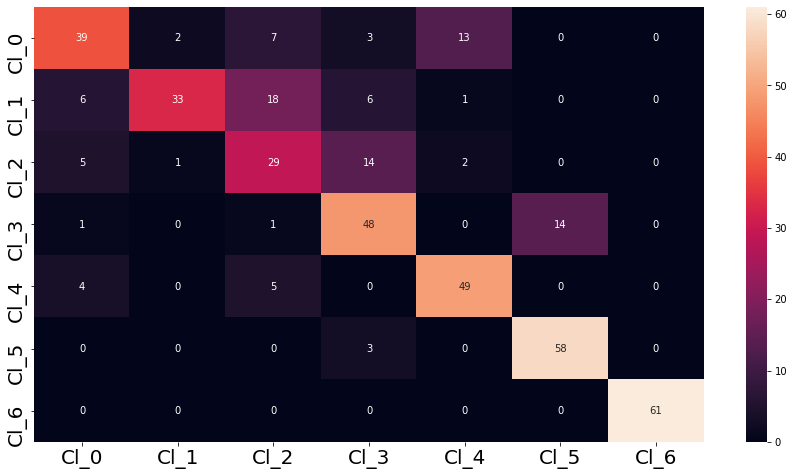

In [1307]:
y_pred = rf_model_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_multiclass=pd.DataFrame(cm,columns=["Cl_0","Cl_1","Cl_2","Cl_3","Cl_4","Cl_5","Cl_6"],
                          index=["Cl_0","Cl_1","Cl_2","Cl_3","Cl_4","Cl_5","Cl_6"])
sns.heatmap(cm_multiclass, annot = True, fmt = 'd')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### Updated Score Card

In [1302]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card
update_score_card("Multiclass Random Forest Classifier after tuning",rf_model_tuned,stability="Not Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


# 13) MultiClass XGBoost Classifier

In [1308]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

xgb_model = XGBClassifier(max_depth = 10, gamma = 1,objective='multi:softprob')
xgb_model.fit(X_train, y_train)
get_train_report(xgb_model)

[07:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       223
           1       0.99      0.99      0.99       226
           2       1.00      1.00      1.00       239
           3       0.99      0.99      0.99       287
           4       1.00      0.99      1.00       214
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       263

    accuracy                           0.99      1688
   macro avg       0.99      0.99      0.99      1688
weighted avg       0.99      0.99      0.99      1688



In [1309]:
get_test_report(xgb_model)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        64
           1       0.91      0.97      0.94        64
           2       0.96      0.88      0.92        51
           3       0.89      1.00      0.94        64
           4       0.97      0.97      0.97        58
           5       1.00      0.98      0.99        61
           6       1.00      1.00      1.00        61

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



#### Updated Score Card

In [1310]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card
update_score_card("Multiclass XGBoost Classifier before tuning",xgb_model,stability="Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055


#### Hyperparameter Tuning

In [789]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier(objective='multi:softprob')
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3)
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[19:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[19:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[20:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### Model fit as hyperparameter values

#### Train

In [1347]:
df_num=df.select_dtypes(include="number")
df_num_X=df_num.drop(columns=["Overwt_Obese"])
df_cat_X_dummy=pd.get_dummies(df_cat_X,drop_first=True)
X=pd.concat([df_cat_X_dummy,df_num_X],axis=1)
y=dfm['NObeyesdad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

xgb_model_tuned = XGBClassifier(learning_rate=0.5,max_depth = 3, gamma = 2)
xgb_model_tuned.fit(X_train, y_train)
get_train_report(xgb_model_tuned)

[13:23:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       223
           1       0.99      0.94      0.96       226
           2       0.97      0.98      0.98       239
           3       0.99      0.99      0.99       287
           4       1.00      0.99      0.99       214
           5       0.99      1.00      1.00       236
           6       1.00      1.00      1.00       263

    accuracy                           0.98      1688
   macro avg       0.98      0.98      0.98      1688
weighted avg       0.98      0.98      0.98      1688



#### Test

In [1348]:
get_test_report(xgb_model_tuned)

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        64
           1       0.91      0.92      0.91        64
           2       0.85      0.92      0.89        51
           3       0.90      0.95      0.92        64
           4       0.96      0.95      0.96        58
           5       0.98      0.98      0.98        61
           6       1.00      1.00      1.00        61

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



#### ROC Curve

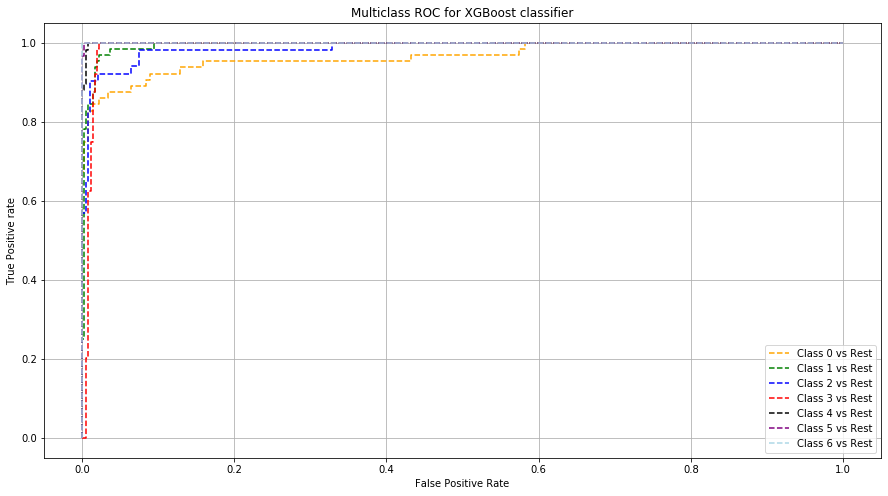

In [1344]:
fpr = {}
tpr = {}
thresh ={}

n_class = 7
y_pred_cnb = xgb_model_tuned.predict(X_test)
y_prob_pred_cnb = xgb_model_tuned.predict_proba(X_test)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='lightblue', label='Class 6 vs Rest')
plt.title('Multiclass ROC for XGBoost classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Confusion Matrix

In [1350]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

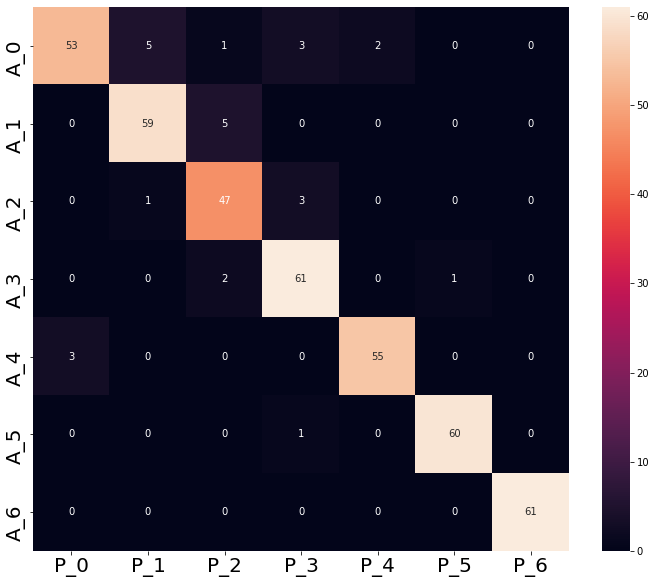

In [1356]:
y_pred = xgb_model_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_multiclass=pd.DataFrame(cm,columns=["P_0","P_1","P_2","P_3","P_4","P_5","P_6"],
                          index=["A_0","A_1","A_2","A_3","A_4","A_5","A_6"])
plt.figure(figsize=(12,10))
sns.heatmap(cm_multiclass, annot = True, fmt = 'd')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### Updated Score Card

In [1314]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred = model.predict_proba(X_test)
    y_pred_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred,multi_class="ovr"),
                                    'Precision': metrics.precision_score(y_test, y_pred_pred,average="weighted"),
                                    'Recall': metrics.recall_score(y_test, y_pred_pred,average="weighted"),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred_pred,average="weighted")}, 
                                    ignore_index = True)
    return score_card
update_score_card("Multiclass XGBoost Classifier after tuning",xgb_model_tuned,stability="Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Binary Logistic Regression,0.690000,Stable,0.921651,0.985268,0.980328,0.993355,0.981087,0.953470,0.986799
1,Simple Binary RFE Logistic Regression,0.840000,Stable,0.918445,0.985894,0.986711,0.986711,0.981087,0.953924,0.986711
2,Binary gNB Classifier,-,Moderate,0.216709,0.915201,0.892256,0.880399,0.839243,0.612136,0.886288
3,Binary KNN Classifier before tuning,-,Moderate,0.723544,0.965879,0.936909,0.986711,0.943262,0.856163,0.961165
4,Binary KNN Classifier after tuning,-,Good,0.815696,0.970100,0.955272,0.993355,0.962175,0.905072,0.973941
5,Binary Decision Tree Classifier before tuning,-,Good,0.792658,0.935978,0.954984,0.986711,0.957447,0.893739,0.970588
6,Binary Decision Tree Classifier after tuning,-,Good,0.723544,0.972551,0.936909,0.986711,0.943262,0.856163,0.961165
7,Binary Random Forest Classifier before tuning,-,Good,0.781139,0.987392,0.960784,0.976744,0.955083,0.889220,0.968699
8,Binary Random Forest Classifier after tuning,-,Good,0.723544,0.986793,0.939683,0.983389,0.943262,0.856889,0.961039
9,Binary XGBClassifier before tuning,-,Moderate,0.873291,0.989529,0.964744,1.000000,0.973995,0.934900,0.982055
